<a href="https://colab.research.google.com/github/Laiba-saeed92/Deep_Learning_projects/blob/main/CNN_image_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving archive (3).zip to archive (3).zip


In [ ]:
import zipfile

with zipfile.ZipFile('archive (3).zip', 'r') as zip_ref:
    zip_ref.extractall('unzipped_data')  # you can name this folder anything

print("Unzipped successfully!")


Unzipped successfully!


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten, MaxPooling2D , Conv2D, BatchNormalization, Dropout
import os #for directories path

In [ ]:
import os

base_dir = 'unzipped_data'  # or whatever folder name you used
for foldername in os.listdir(base_dir):
    print(foldername)


Intel Image Dataset


In [ ]:
#Load Images for Model Training
#If it's a classification task and your data is in subfolders by class:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    base_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    base_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)
test_data = datagen.flow_from_directory(base_dir, target_size=(256, 256), batch_size=32, class_mode='categorical', shuffle=False)

Found 2400 images belonging to 1 classes.
Found 600 images belonging to 1 classes.
Found 3000 images belonging to 1 classes.


In [ ]:
#CREATE CNN MODEL
model=Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))

model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='softmax'))
model.summary()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history= model.fit(train_data, epochs=10, validation_data= val_data) #Data is a pre-split dataset (tf.data.Dataset)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


75/75 ━━━━━━━━━━━━━━━━━━━━ 17s 117ms/step - accuracy: 0.9515 - loss: 0.0463 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 76ms/step - accuracy: 1.0000 - loss: 1.4410e-34 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 76ms/step - accuracy: 1.

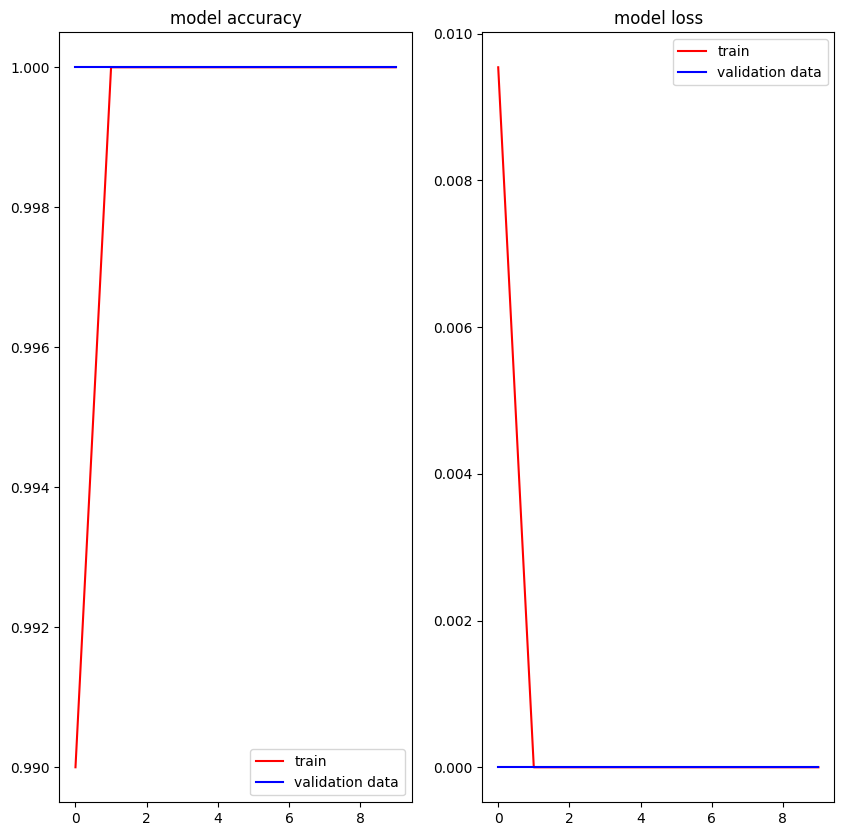

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation data')
plt.legend()
plt.title('model accuracy')
plt.subplot(1,2,2)
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation data')
plt.legend()
plt.title('model loss')
plt.legend()
plt.show()

In [ ]:
y_pred=model.predict(val_data)

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step


In [ ]:
#ACCURACY OF THE THE MODEL
loss, accuracy = model.evaluate(val_data) #As we have divided the val_data into batches so direct using accuracy_score(y_pred, val_data) will cause error because of length issues so we use this method
print(f"Validation Accuracy: {accuracy:.2f}")# It handles batched datasets,Binary/multiclass, Automatically compares predictions with labels
print(f"Validation loss: {loss:.2f}")


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Validation Accuracy: 1.00
Validation loss: 0.00


In [ ]:
#ACCURACY AND LOSS OF TEST DATA
loss, accuracy = model.evaluate(test_data) ## It handles batched datasets,Binary/multiclass, Automatically compares predictions with labels


94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 1.0000 - loss: 0.0000e+00
